In [2]:
library(tidyr)
library(pheatmap)
library(RColorBrewer)
library(data.table)
library(stringr)

In [3]:
maindir     = '/path/to/caQTL/stuff/caQTLs_rasqual/'

run <- 'run1'

setwd(maindir)

celltypes_no_bulk =  c('acinar','alpha','beta','delta','ductal','endothelial','gamma',
                'immune','stellate')
celltypes =  c('acinar','alpha','beta','delta','ductal','endothelial','gamma',
                'immune','stellate','bulk')

Load QTL Results

In [7]:
RES_all = data.frame()
for (c in celltypes) {
    tabname_all = paste0(c, '/',run,"/Results_",run,"F_all.tsv")
    results_all = read.table(tabname_all, header=T, stringsAsFactors = F)
    results_all$cell = c
    RES_all = rbind(RES_all, results_all)
}

dim(RES_all)
head(RES_all)

[1] 34898761       31

,Feature,rsID,Chromosome,position,Ref,Alt,Af,HWEChi_square,IA,Log10_qval,⋯,Log_likelihood_H0,Convergence_status,r2_fSNPs,r2_rSNP,P_VAl,dist,flag_fdr10,flag_fdr05,flag_fdr01,cell
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<lgl>,<lgl>,<lgl>,<chr>
1,chr6:32622377-32623439,chr6:32620608:T:A,chr6,32620608,T,A,0.425926,2.231991,0.998678,-67.03611,⋯,156.3965,0,0.991233,0.824496,8.976233e-71,-2300,TRUE,TRUE,TRUE,acinar
2,chr6:32622377-32623439,chr6:32620292:C:T,chr6,32620292,C,T,0.481481,3.033058,0.997176,-67.03611,⋯,155.1102,0,0.991113,0.766739,3.415022e-70,-2616,TRUE,TRUE,TRUE,acinar
3,chr6:32622377-32623439,chr6:32620069:C:T,chr6,32620069,C,T,0.481481,3.033058,0.997249,-67.03611,⋯,155.1102,0,0.991113,0.766739,3.415022e-70,-2839,TRUE,TRUE,TRUE,acinar
4,chr6:32622377-32623439,chr6:32620254:G:A,chr6,32620254,G,A,0.481481,3.033058,0.997319,-67.03611,⋯,155.0975,0,0.991113,0.767647,3.459474e-70,-2654,TRUE,TRUE,TRUE,acinar
5,chr6:32622377-32623439,chr6:32623176:T:C,chr6,32623176,T,C,0.462963,1.913385,0.999952,-66.25852,⋯,152.2692,0,0.991231,0.777224,5.637594e-69,268,TRUE,TRUE,TRUE,acinar
6,chr6:32622377-32623439,chr6:32623122:G:T,chr6,32623122,G,T,0.462963,1.913385,0.999952,-66.25852,⋯,152.2670,0,0.987012,0.777217,5.650015e-69,214,TRUE,TRUE,TRUE,acinar


Create Filter

In [8]:
RES_all$exclude = RES_all$Sequencing_mapping_error_rate>0.1 | RES_all$Ref_allele_bias<0.2 | RES_all$Ref_allele_bias>0.8    

RES_all$qtl = RES_all$flag_fdr05==T & RES_all$exclude ==F
RES_all$feature_snp = paste(RES_all$Feature, RES_all$rsID, sep="_")

write.table(RES_all, "Summary_allCells_all_run1F.tsv", sep="\t", row.names=F, quote=F)

In [6]:
RES_all =read.table( "Summary_allCells_all_run1F.tsv", header=T)
dim(RES_all)
head(RES_all)

[1] 34898761       34

,Feature,rsID,Chromosome,position,Ref,Alt,Af,HWEChi_square,IA,Log10_qval,⋯,r2_rSNP,P_VAl,dist,flag_fdr10,flag_fdr05,flag_fdr01,cell,exclude,qtl,feature_snp
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<int>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<chr>
1,chr6:32622377-32623439,chr6:32620608:T:A,chr6,32620608,T,A,0.425926,2.231991,0.998678,-67.03611,⋯,0.824496,8.976233e-71,-2300,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr6:32622377-32623439_chr6:32620608:T:A
2,chr6:32622377-32623439,chr6:32620292:C:T,chr6,32620292,C,T,0.481481,3.033058,0.997176,-67.03611,⋯,0.766739,3.415022e-70,-2616,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr6:32622377-32623439_chr6:32620292:C:T
3,chr6:32622377-32623439,chr6:32620069:C:T,chr6,32620069,C,T,0.481481,3.033058,0.997249,-67.03611,⋯,0.766739,3.415022e-70,-2839,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr6:32622377-32623439_chr6:32620069:C:T
4,chr6:32622377-32623439,chr6:32620254:G:A,chr6,32620254,G,A,0.481481,3.033058,0.997319,-67.03611,⋯,0.767647,3.459474e-70,-2654,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr6:32622377-32623439_chr6:32620254:G:A
5,chr6:32622377-32623439,chr6:32623176:T:C,chr6,32623176,T,C,0.462963,1.913385,0.999952,-66.25852,⋯,0.777224,5.637594e-69,268,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr6:32622377-32623439_chr6:32623176:T:C
6,chr6:32622377-32623439,chr6:32623122:G:T,chr6,32623122,G,T,0.462963,1.913385,0.999952,-66.25852,⋯,0.777217,5.650015e-69,214,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr6:32622377-32623439_chr6:32623122:G:T


In [7]:
#RES_sig =read.table( "Summary_allCells_sig_run7F.tsv", header=T)
#dim(RES_sig)
#head(RES_sig)

[1] 532846     34

,Feature,rsID,Chromosome,position,Ref,Alt,Af,HWEChi_square,IA,Log10_qval,⋯,r2_rSNP,P_VAl,dist,flag_fdr10,flag_fdr05,flag_fdr01,cell,exclude,qtl,feature_snp
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<int>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<chr>
1,chr9:6931452-6932441,chr9:6932144:C:G,chr9,6932144,C,G,0.425,2.176987,0.993495,-32.57221,⋯,0.985165,1.644066e-33,198,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr9:6931452-6932441_chr9:6932144:C:G
2,chr9:6931452-6932441,chr9:6931726:G:C,chr9,6931726,G,C,0.425,2.176987,0.993495,-32.57221,⋯,0.984820,1.650756e-33,-220,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr9:6931452-6932441_chr9:6931726:G:C
3,chr9:6931452-6932441,chr9:6925663:C:T,chr9,6925663,C,T,0.425,2.176987,0.999952,-32.57221,⋯,0.992259,1.652158e-33,-6283,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr9:6931452-6932441_chr9:6925663:C:T
4,chr9:6931452-6932441,chr9:6922614:G:A,chr9,6922614,G,A,0.425,2.176987,0.996300,-32.57221,⋯,0.983882,1.656375e-33,-9332,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr9:6931452-6932441_chr9:6922614:G:A
5,chr9:6931452-6932441,chr9:6931755:T:C,chr9,6931755,T,C,0.425,2.176987,0.993495,-32.57221,⋯,0.984930,1.715921e-33,-191,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr9:6931452-6932441_chr9:6931755:T:C
6,chr9:6931452-6932441,chr9:6931753:A:G,chr9,6931753,A,G,0.425,2.176987,0.993495,-32.57221,⋯,0.984902,1.716346e-33,-193,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr9:6931452-6932441_chr9:6931753:A:G


In [10]:
RES = data.frame()
for (c in celltypes) {
    tabname = paste0(c, '/',run,"/Results_",run,"F_lead.tsv")
    results = read.table(tabname, header=T, stringsAsFactors = F)
    results$cell = c
    RES = rbind(RES, results)
}

In [11]:
dim(RES)
head(RES)

[1] 773267     31

,Feature,rsID,Chromosome,position,Ref,Alt,Af,HWEChi_square,IA,Log10_qval,⋯,Log_likelihood_H0,Convergence_status,r2_fSNPs,r2_rSNP,P_VAl,dist,flag_fdr10,flag_fdr05,flag_fdr01,cell
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<lgl>,<lgl>,<lgl>,<chr>
1,chr6:32622377-32623439,chr6:32620608:T:A,chr6,32620608,T,A,0.425926,2.231991,0.998678,-67.03611,⋯,156.39647,0,0.991233,0.824496,8.976233e-71,-2300,TRUE,TRUE,TRUE,acinar
2,chr9:6931452-6932441,chr9:6929401:T:A,chr9,6929401,T,A,0.333333,0.750000,0.993936,-36.60879,⋯,82.46148,0,0.977371,0.985795,1.925609e-38,-2545,TRUE,TRUE,TRUE,acinar
3,chr4:7164816-7165698,chr4:7160692:T:C,chr4,7160692,T,C,0.277778,0.006391,0.999935,-32.46831,⋯,72.33801,0,0.988775,0.902371,1.502522e-34,-4565,TRUE,TRUE,TRUE,acinar
4,chr9:93230239-93231938,chr9:93231475:G:A,chr9,93231475,G,A,0.222222,0.137755,0.999392,-30.83427,⋯,67.79054,0,0.988759,0.992117,3.105136e-32,387,TRUE,TRUE,TRUE,acinar
5,chr17:76968760-76970675,chr17:76972946:C:A,chr17,76972946,C,A,0.296296,0.337734,0.980182,-29.73370,⋯,67.21293,0,0.985793,0.940828,4.969777e-32,3228,TRUE,TRUE,TRUE,acinar
6,chr21:13979625-13980808,chr21:13980560:G:C,chr21,13980560,G,C,0.314815,0.083599,0.930667,-27.70426,⋯,62.96620,0,0.891880,0.870565,7.793799e-30,344,TRUE,TRUE,TRUE,acinar


In [12]:
RES$exclude = RES$Sequencing_mapping_error_rate>0.1 | RES$Ref_allele_bias<0.2 | RES$Ref_allele_bias>0.8    

RES$qtl = RES$flag_fdr05==T & RES$exclude ==F
RES$feature_snp = paste(RES$Feature, RES$rsID, sep="_")

write.table(RES, "Summary_allCells_leads_run1F.tsv", sep="\t", row.names=F, quote=F)

In [4]:
RES =read.table( "Summary_allCells_leads_run1F.tsv", header=T)
dim(RES)
head(RES)

[1] 773267     34

,Feature,rsID,Chromosome,position,Ref,Alt,Af,HWEChi_square,IA,Log10_qval,⋯,r2_rSNP,P_VAl,dist,flag_fdr10,flag_fdr05,flag_fdr01,cell,exclude,qtl,feature_snp
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<int>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<chr>
1,chr6:32622377-32623439,chr6:32620608:T:A,chr6,32620608,T,A,0.425926,2.231991,0.998678,-67.03611,⋯,0.824496,8.976233e-71,-2300,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr6:32622377-32623439_chr6:32620608:T:A
2,chr9:6931452-6932441,chr9:6929401:T:A,chr9,6929401,T,A,0.333333,0.750000,0.993936,-36.60879,⋯,0.985795,1.925609e-38,-2545,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr9:6931452-6932441_chr9:6929401:T:A
3,chr4:7164816-7165698,chr4:7160692:T:C,chr4,7160692,T,C,0.277778,0.006391,0.999935,-32.46831,⋯,0.902371,1.502522e-34,-4565,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr4:7164816-7165698_chr4:7160692:T:C
4,chr9:93230239-93231938,chr9:93231475:G:A,chr9,93231475,G,A,0.222222,0.137755,0.999392,-30.83427,⋯,0.992117,3.105136e-32,387,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr9:93230239-93231938_chr9:93231475:G:A
5,chr17:76968760-76970675,chr17:76972946:C:A,chr17,76972946,C,A,0.296296,0.337734,0.980182,-29.73370,⋯,0.940828,4.969777e-32,3228,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr17:76968760-76970675_chr17:76972946:C:A
6,chr21:13979625-13980808,chr21:13980560:G:C,chr21,13980560,G,C,0.314815,0.083599,0.930667,-27.70426,⋯,0.870565,7.793799e-30,344,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr21:13979625-13980808_chr21:13980560:G:C


In [7]:
res = subset(RES, cell!="bulk")
res_all = subset(RES_all, cell!="bulk")

In [8]:
sum(!duplicated(res$rsID))
sum(!duplicated(RES$rsID))

[1] 378948

[1] 516632

In [15]:
sum(!duplicated(res$rsID))
sum(!duplicated(RES$rsID))

[1] 378948

[1] 516632

In [16]:
sum(!duplicated(res$Feature[res$flag_fdr10 & res$exclude==FALSE]))
sum(!duplicated(res$Feature[res$flag_fdr05 & res$exclude==FALSE]))

sum(!duplicated(RES$Feature[RES$flag_fdr10 & RES$exclude==FALSE]))
sum(!duplicated(RES$Feature[RES$flag_fdr05 & RES$exclude==FALSE]))

[1] 12975

[1] 9545

[1] 19561

[1] 14514

Plots: cell # vs # QTLs

In [9]:
dat <- read.table("/path/to/caQTL/stuff/barcode_celltypes.txt", header=T)
dat <- dplyr::select(dat, -V1)
head(dat)

,celltype,sample,barcode
,<chr>,<chr>,<chr>
1,beta,R207,CB:Z:AAACAGCCAAACGGGC-1
2,beta,R207,CB:Z:AAACAGCCATAATCCG-1
3,beta,R207,CB:Z:AAACATGCACAATGTT-1
4,beta,R207,CB:Z:AAACATGCAGCACCAT-1
5,beta,R207,CB:Z:AAACCAACAATTGCGC-1
6,beta,R207,CB:Z:AAACCAACAGGGAGGA-1


In [10]:
major_colors = c('acinar'='#09850B', 'alpha'='#F51646', 'beta'='#3F98E0',
                 'delta'='#E39E14', 'ductal'='#F5DE6C', 'endothelial'='#752BBA', 
                 'gamma'='#A1D99B', 'immune'='#F598C9', 
                 'schwann'='#A84E03', 'stellate'='#FDBB84', 'bulk'='gray')

clrs =data.frame(cellt = names(major_colors),major_colors )

clrs = clrs[order(clrs$cellt),]

major_colors

acinar       alpha        beta       delta      ductal endothelial 
  "#09850B"   "#F51646"   "#3F98E0"   "#E39E14"   "#F5DE6C"   "#752BBA" 
      gamma      immune     schwann    stellate        bulk 
  "#A1D99B"   "#F598C9"   "#A84E03"   "#FDBB84"      "gray"

In [11]:
tb = table(dat$celltype)
tb = tb[names(tb) %in% celltypes]
tb_all <- table(c(dat$celltype, rep('bulk', length(dat$celltype))))
tb_all = tb_all[names(tb_all) %in% celltypes]
res$feature_snp = paste(res$Feature, res$rsID, sep="_")
res_sig = subset(res, flag_fdr05==T & exclude ==F)
qtls_macro= as.data.frame(table(res_sig$cell))
dt_macro = dplyr::left_join(as.data.frame(tb), qtls_macro, by="Var1")

RES$feature_snp = paste(RES$Feature, RES$rsID, sep="_")
RES_sig = subset(RES, flag_fdr05==T & exclude ==F)
qtls_all= as.data.frame(table(RES_sig$cell))
dt_all = dplyr::left_join(as.data.frame(tb_all), qtls_all, by="Var1")

dt_macro
dt_all

Var1,Freq.x,Freq.y
<fct>,<int>,<int>
acinar,27387,2127
alpha,44500,4203
beta,81100,5913
delta,8911,875
ductal,5452,266
endothelial,342,NA
gamma,5504,523
immune,633,4
stellate,922,2


Var1,Freq.x,Freq.y
<fct>,<int>,<int>
acinar,27387,2127
alpha,44500,4203
beta,81100,5913
bulk,174819,12186
delta,8911,875
ductal,5452,266
endothelial,342,NA
gamma,5504,523
immune,633,4


In [28]:
write.table(dt_macro,'/path/to/caQTL/stuff/figures/cell_counts_ggplot/no_bulk_counts.csv',
           col.names=T, row.names=F, quote=F)
write.table(dt_all,'/path/to/caQTL/stuff/figures/cell_counts_ggplot/bulk_counts.csv',
           col.names=T, row.names=F, quote=F)

In [16]:
#tb = table(dat$celltype)
#tb = tb[names(tb) %in% celltypes]
#tb_all <- table(c(dat$celltype, rep('bulk', length(dat$celltype))))
#tb_all = tb_all[names(tb_all) %in% celltypes]
#res$feature_snp = paste(res$Feature, res$rsID, sep="_")
#res_sig = subset(res, flag_fdr05==T & exclude ==F)
#qtls_macro= as.data.frame(table(res_sig$cell))
#dt_macro = dplyr::left_join(as.data.frame(tb), qtls_macro, by="Var1")
#
#RES$feature_snp = paste(RES$Feature, RES$rsID, sep="_")
#RES_sig = subset(RES, flag_fdr05==T & exclude ==F)
#qtls_all= as.data.frame(table(RES_sig$cell))
#dt_all = dplyr::left_join(as.data.frame(tb_all), qtls_all, by="Var1")
#
#dt_macro
#dt_all

Var1,Freq.x,Freq.y
<fct>,<int>,<int>
acinar,27387,1711
alpha,44500,2947
beta,81100,4797
delta,8911,588
ductal,5452,205
endothelial,342,NA
gamma,5504,356
immune,633,2
stellate,922,2


Var1,Freq.x,Freq.y
<fct>,<int>,<int>
acinar,27387,1711
alpha,44500,2947
beta,81100,4797
bulk,174819,9604
delta,8911,588
ductal,5452,205
endothelial,342,NA
gamma,5504,356
immune,633,2


In [12]:
macro = c('acinar','alpha','beta','delta','ductal','endothelial','gamma',
                'immune','stellate')
all = c('acinar','alpha','beta','delta','ductal','endothelial','gamma',
                'immune','stellate','bulk')

In [13]:
macro

[1] "acinar"      "alpha"       "beta"        "delta"       "ductal"     
[6] "endothelial" "gamma"       "immune"      "stellate"

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


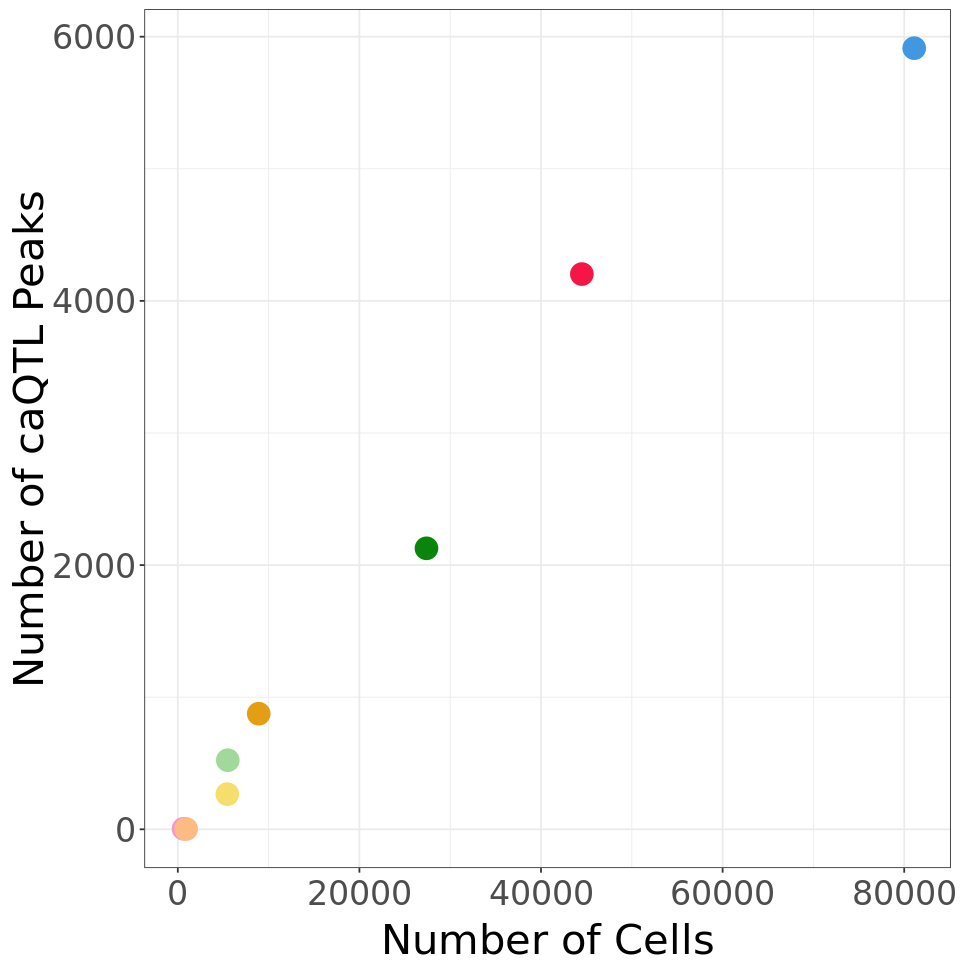

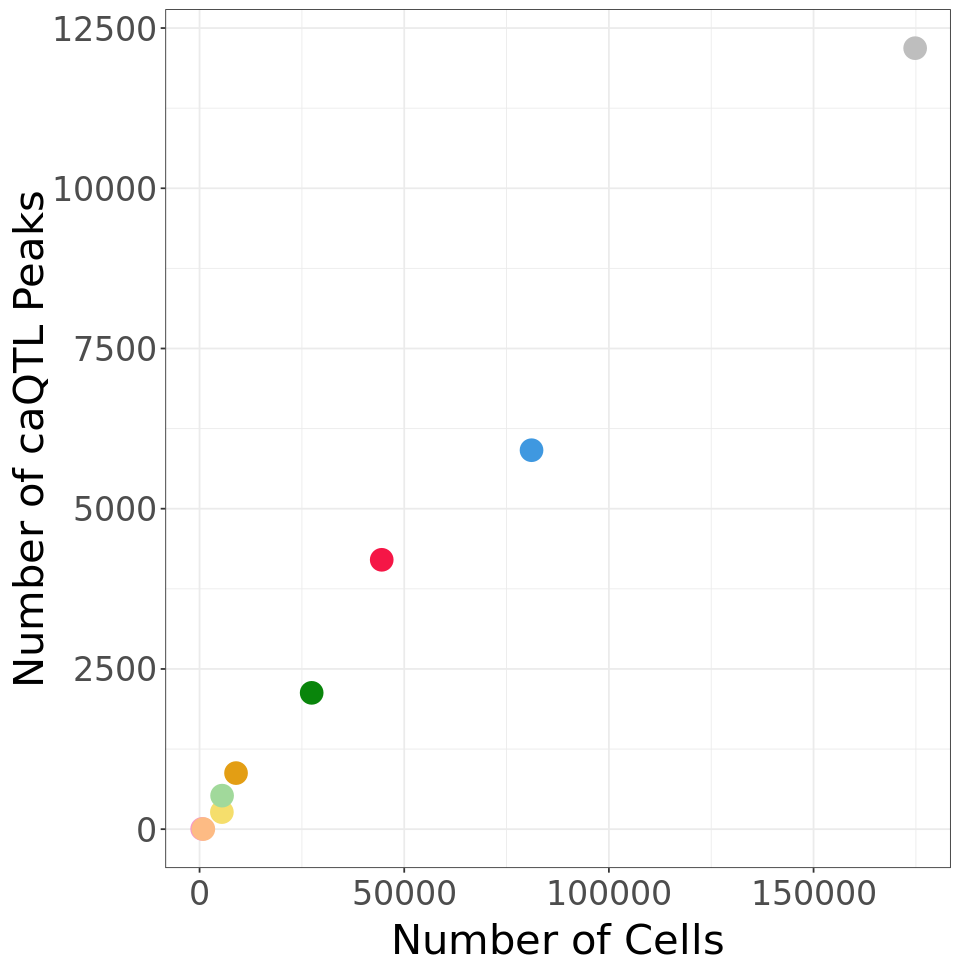

In [29]:
#library(ggrepel)
options(repr.plot.width=8, repr.plot.height=8)
theme_set(
    theme_bw())

ggplot(dt_macro, aes(x=Freq.x, y=Freq.y, color=Var1)) + 
        geom_point(size=6, aes(colour=Var1)) + 
        labs(x = "Number of Cells", y = "Number of caQTL Peaks", color="Cell Type") + 
        scale_color_manual(values=major_colors) + 
        theme(axis.text.x=element_text(size=20, vjust=0.5),
        axis.text.y=element_text(size=20, vjust=0.5),
        axis.title.x = element_text(size=25, vjust=-0.35),
        axis.title.y = element_text(size=25, vjust=0.5),
        plot.title = element_text(size=25, hjust=0.5, face="bold"),
        legend.position = "none")

ggplot(dt_all, aes(x=Freq.x, y=Freq.y, color=Var1)) + 
        geom_point(size=6, aes(colour=Var1)) + 
        labs(x = "Number of Cells", y = "Number of caQTL Peaks", color="Cell Type") + 
        scale_color_manual(values=major_colors) + 
        theme(axis.text.x=element_text(size=20, vjust=0.5),
        axis.text.y=element_text(size=20, vjust=0.5),
        axis.title.x = element_text(size=25, vjust=-0.35),
        axis.title.y = element_text(size=25, vjust=0.5),
        plot.title = element_text(size=25, hjust=0.5, face="bold"),
        legend.position = "none")

In [30]:
#library(ggrepel)
pdf('/path/to/caQTL/stuff/figures/cell_counts_ggplot/no_legend.pdf', width=8, height=8)
theme_set(
    theme_bw())

ggplot(dt_macro, aes(x=Freq.x, y=Freq.y, color=Var1)) + 
        geom_point(size=6, aes(colour=Var1)) + 
        labs(x = "Number of Cells", y = "Number of caQTL Peaks", color="Cell Type") + 
        scale_color_manual(values=major_colors) + 
        theme(axis.text.x=element_text(size=20, vjust=0.5),
        axis.text.y=element_text(size=20, vjust=0.5),
        axis.title.x = element_text(size=25, vjust=-0.35),
        axis.title.y = element_text(size=25, vjust=0.5),
        plot.title = element_text(size=25, hjust=0.5, face="bold"),
        legend.position = "none")

ggplot(dt_all, aes(x=Freq.x, y=Freq.y, color=Var1)) + 
        geom_point(size=6, aes(colour=Var1)) + 
        labs(x = "Number of Cells", y = "Number of caQTL Peaks", color="Cell Type") + 
        scale_color_manual(values=major_colors) + 
        theme(axis.text.x=element_text(size=20, vjust=0.5),
        axis.text.y=element_text(size=20, vjust=0.5),
        axis.title.x = element_text(size=25, vjust=-0.35),
        axis.title.y = element_text(size=25, vjust=0.5),
        plot.title = element_text(size=25, hjust=0.5, face="bold"),
        legend.position = "none")

dev.off()

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


png 
  2

In [31]:
#library(ggrepel)
pdf('/path/to/caQTL/stuff/figures/cell_counts_ggplot/legend.pdf', width=8, height=8)
theme_set(
    theme_bw())

ggplot(dt_macro, aes(x=Freq.x, y=Freq.y, color=Var1)) + 
        geom_point(size=6, aes(colour=Var1)) + 
        labs(x = "Number of Cells", y = "Number of caQTL Peaks", color="Cell Type") + 
        scale_color_manual(values=major_colors) + 
        theme(axis.text.x=element_text(size=20, vjust=0.5),
        axis.text.y=element_text(size=20, vjust=0.5),
        axis.title.x = element_text(size=25, vjust=-0.35),
        axis.title.y = element_text(size=25, vjust=0.5),
        plot.title = element_text(size=25, hjust=0.5, face="bold"))

ggplot(dt_all, aes(x=Freq.x, y=Freq.y, color=Var1)) + 
        geom_point(size=6, aes(colour=Var1)) + 
        labs(x = "Number of Cells", y = "Number of caQTL Peaks", color="Cell Type") + 
        scale_color_manual(values=major_colors) + 
        theme(axis.text.x=element_text(size=20, vjust=0.5),
        axis.text.y=element_text(size=20, vjust=0.5),
        axis.title.x = element_text(size=25, vjust=-0.35),
        axis.title.y = element_text(size=25, vjust=0.5),
        plot.title = element_text(size=25, hjust=0.5, face="bold"))

dev.off()

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


png 
  2

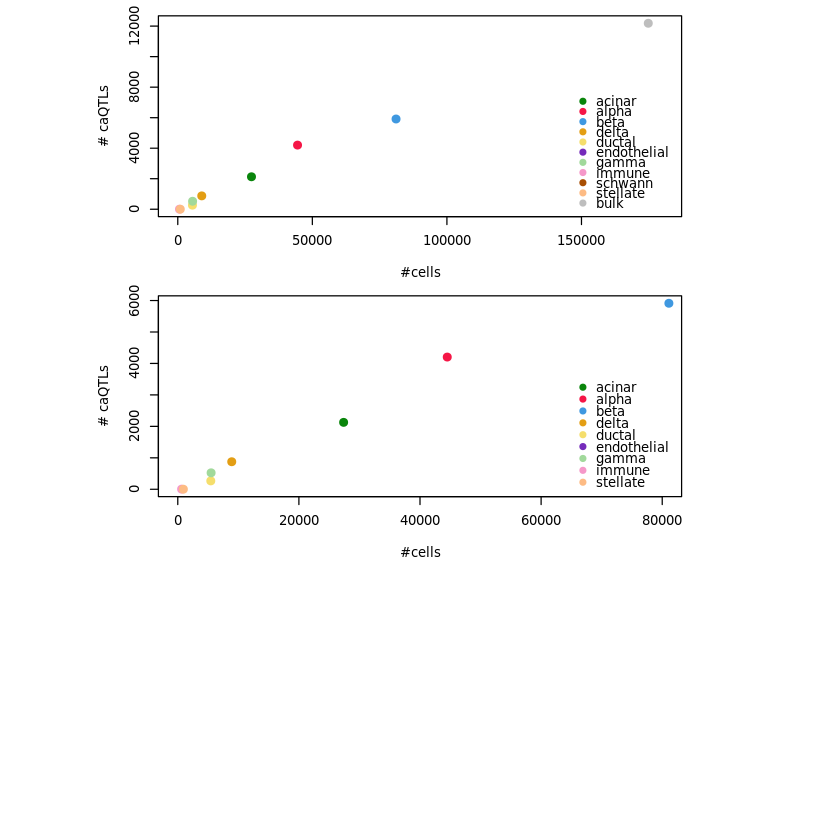

In [21]:
#pdf("/path/to/caQTL/stuff/figures/cell_number_vs_qtls_run1F.pdf")
par(mfrow=c(3,1), mar=c(4,10,1,10))

plot(Freq.y~Freq.x, dt_all, pch=19, xlim=c(0,180000), xlab = "#cells", ylab = "# caQTLs",
     col = clrs[match(dt_all$Var1,clrs$cellt) ,2], cex=1.3)
legend( "bottomright", legend =names(major_colors), col = major_colors, bty="n", pch=19, y.intersp = 0.6)

plot(Freq.y~Freq.x, dt_macro, pch=19, xlim=c(0,80000), xlab = "#cells", ylab = "# caQTLs",
     col = clrs[match(dt_macro$Var1,clrs$cellt) ,2], cex=1.3)
legend( "bottomright", legend =names(major_colors[macro]), col = major_colors[macro], bty="n", pch=19, y.intersp = 0.7)

#dt2 = subset(dt, Var1 %in% micro)
#plot(Freq.y~Freq.x, dt2, pch=19, xlim=c(0,50000), xlab = "#cells", ylab = "# caQTLs",
#     col = clrs[match(dt2$Var1,clrs$cellt) ,2], cex=1.3)
#legend( "bottomright", legend =names(colors[micro]), col = colors[micro], bty="n", pch=19, y.intersp = 0.7)

#dev.off()

In [24]:
pdf("/path/to/caQTL/stuff/figures/cell_number_vs_qtls_run1F.pdf")
par(mfrow=c(3,1), mar=c(4,10,1,10))

plot(Freq.y~Freq.x, dt_all, pch=19, xlim=c(0,180000), xlab = "#cells", ylab = "# caQTLs",
     col = clrs[match(dt_all$Var1,clrs$cellt) ,2], cex=1.3)
legend( "bottomright", legend =names(major_colors), col = major_colors, bty="n", pch=19, y.intersp = 0.6)

plot(Freq.y~Freq.x, dt_macro, pch=19, xlim=c(0,80000), xlab = "#cells", ylab = "# caQTLs",
     col = clrs[match(dt_macro$Var1,clrs$cellt) ,2], cex=1.3)
legend( "bottomright", legend =names(major_colors[macro]), col = major_colors[macro], bty="n", pch=19, y.intersp = 0.7)

#dt2 = subset(dt, Var1 %in% micro)
#plot(Freq.y~Freq.x, dt2, pch=19, xlim=c(0,50000), xlab = "#cells", ylab = "# caQTLs",
#     col = clrs[match(dt2$Var1,clrs$cellt) ,2], cex=1.3)
#legend( "bottomright", legend =names(colors[micro]), col = colors[micro], bty="n", pch=19, y.intersp = 0.7)

dev.off()

png 
  2

In [22]:
mac        = setNames(dt_macro[,3],dt_macro[,1])
mac = sort(mac, decreasing=F)
#mic        = setNames(dt2[,3],dt2[,1]) 
mac

mac_bulk        = setNames(dt_all[,3],dt_all[,1])
mac_bulk = sort(mac_bulk, decreasing=F)
#mic        = setNames(dt2[,3],dt2[,1]) 
mac_bulk

stellate   immune   ductal    gamma    delta   acinar    alpha     beta 
       2        4      266      523      875     2127     4203     5913

stellate   immune   ductal    gamma    delta   acinar    alpha     beta 
       2        4      266      523      875     2127     4203     5913 
    bulk 
   12186

In [21]:
#mac        = setNames(dt_macro[,3],dt_macro[,1])
#mac = sort(mac, decreasing=F)
##mic        = setNames(dt2[,3],dt2[,1]) 
#mac
#
#mac_bulk        = setNames(dt_all[,3],dt_all[,1])
#mac_bulk = sort(mac_bulk, decreasing=F)
##mic        = setNames(dt2[,3],dt2[,1]) 
#mac_bulk

immune stellate   ductal    gamma    delta   acinar    alpha     beta 
       2        2      205      356      588     1711     2947     4797

immune stellate   ductal    gamma    delta   acinar    alpha     beta 
       2        2      205      356      588     1711     2947     4797 
    bulk 
    9604

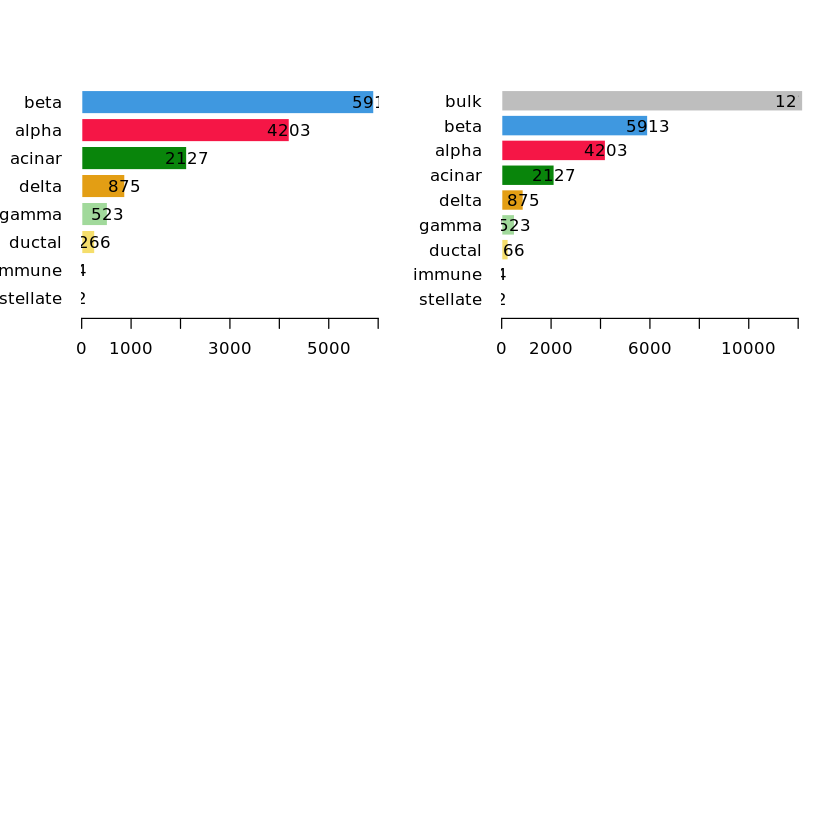

In [23]:
#pdf("/path/to/caQTL/stuff/figures/barplots_caqtlsums_run1F.pdf")
par(mfrow=c(2,2), las=1)
bp<-barplot(mac, col= major_colors[names(mac)], border = F, xlim = c(0,6000), horiz = T)
text(x=mac, y=bp, labels=mac)

bp<-barplot(mac_bulk, col= major_colors[names(mac_bulk)], border = F, xlim = c(0,12000), horiz = T)
text(x=mac_bulk, y=bp, labels=mac_bulk)
#bp<-barplot(mic[rev(micro)], col= colors[rev(micro)], border = F, xlim = c(0,6000), horiz = T)
#text(x=mic[rev(micro)], y=bp, labels=mic[rev(micro)])
#dev.off()

In [83]:
mac_frame <- data.frame(counts=mac)
mac_frame$celltype <- rownames(mac_frame)
mac_frame <- dplyr::arrange(mac_frame, -counts)
mac_frame$celltype <- factor(mac_frame$celltype, levels=mac_frame$celltype)
mac_frame

,counts,celltype
,<int>,<fct>
beta,5913,beta
alpha,4203,alpha
acinar,2127,acinar
delta,875,delta
gamma,523,gamma
ductal,266,ductal
immune,4,immune
stellate,2,stellate


In [84]:
mac_frame$celltype

[1] beta     alpha    acinar   delta    gamma    ductal   immune   stellate
Levels: beta alpha acinar delta gamma ductal immune stellate

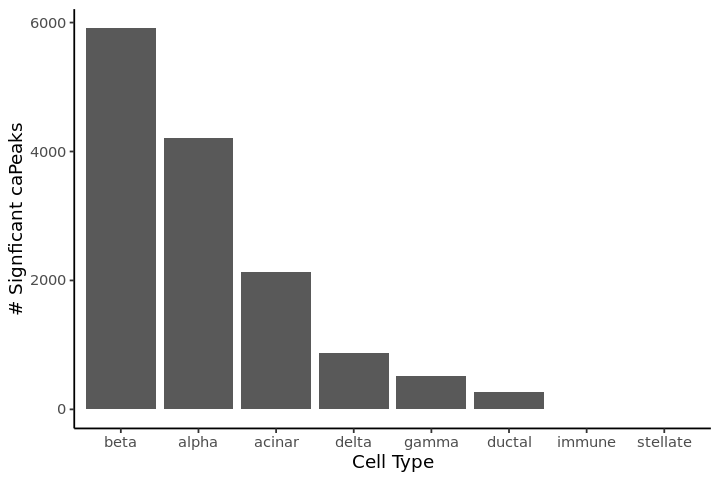

In [95]:
#library(ggplot2)

options(repr.plot.width=6, repr.plot.height=4)

ggplot(mac_frame, aes(y=counts, x=celltype, color)) + 
    geom_col() + 
    theme_classic() + 
    ylab('# Signficant caPeaks') +
    xlab('Cell Type') +
    

In [25]:
pdf("/path/to/caQTL/stuff/figures/barplots_caqtlsums_run1F.pdf")
par(mfrow=c(2,2), las=1)
bp<-barplot(mac, col= major_colors[names(mac)], border = F, xlim = c(0,6000), horiz = T)
text(x=mac, y=bp, labels=mac)

bp<-barplot(mac_bulk, col= major_colors[names(mac_bulk)], border = F, xlim = c(0,12000), horiz = T)
text(x=mac_bulk, y=bp, labels=mac_bulk)
#bp<-barplot(mic[rev(micro)], col= colors[rev(micro)], border = F, xlim = c(0,6000), horiz = T)
#text(x=mic[rev(micro)], y=bp, labels=mic[rev(micro)])
dev.off()

png 
  2

### Celltype correlations of effects

In [26]:
inter <- celltypes_no_bulk %>% 
    purrr::map_dfr(\(x) cbind(
        read.table(paste0("/path/to/peaks/recluster_final_majorCTs_v2/",x,".merged_peaks.anno.mergedOverlap.bed")),
        read.table(paste0("/path/to/peaks/recluster_final_majorCTs_v2/",x,".merged_peaks.anno.bed"), col.names=c("V4","V5","V6","V7"))))

inter <- dplyr::arrange(inter, V1, V2)

inter$Peak = paste0(inter[,1], ':',inter[,2],'-' ,inter[,3])

head(inter, n=20)
dim(inter)

,V1,V2,V3,V4,V5,V6,V7,Peak
,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>
1,chr1,9912,10689,chr1,9912,10612,acinar,chr1:9912-10689
2,chr1,9912,10689,chr1,9913,10658,alpha,chr1:9912-10689
3,chr1,9912,10689,chr1,9913,10663,beta,chr1:9912-10689
4,chr1,9912,10689,chr1,9913,10689,delta,chr1:9912-10689
5,chr1,9912,10689,chr1,9913,10643,ductal,chr1:9912-10689
6,chr1,9912,10689,chr1,9931,10550,endothelial,chr1:9912-10689
7,chr1,9912,10689,chr1,9919,10684,gamma,chr1:9912-10689
8,chr1,9912,10689,chr1,9937,10636,immune,chr1:9912-10689
9,chr1,9912,10689,chr1,9942,10561,stellate,chr1:9912-10689


[1] 883312      8

In [28]:
celltype_sel = celltypes_no_bulk

cormat = matrix(NA, ncol=length(celltype_sel) , nrow=length(celltype_sel))
rownames(cormat)= colnames(cormat) = celltype_sel

wideFDR = spread(data = res[,c('feature_snp', 'cell', 'qtl')], key=cell, value =qtl )

col = colorRampPalette(brewer.pal(9, "Purples"))(20)

In [29]:
celltype_sel <- celltype_sel[!(celltypes_no_bulk %in% c('endothelial','immune','stellate'))]

In [31]:
run

[1] "run1"

In [32]:
#for(c1 in celltype_sel[11:16]){
for(c1 in celltype_sel){
    
a = suppressWarnings(fread(paste(c1,run, "Results_run1F_all.tsv", sep="/"))) 
real = subset(inter, V7 ==c1)
a = subset(a, Feature %in% real$Peak)

    for(c2 in celltype_sel){

b = suppressWarnings(fread(paste(c2,run, "Results_run1F_all.tsv", sep="/"))) 
real = subset(inter, V7 ==c2)
b = subset(b, Feature %in% real$Peak)

a$feature_snp = paste(a$Feature, a$rsID, sep="_")
b$feature_snp = paste(b$Feature, b$rsID, sep="_")

m = merge(a[,c('feature_snp',"Feature","P_VAl" ,'Effect_size')] , b[,c('feature_snp','Effect_size',"P_VAl")], by="feature_snp")

sig = unique(na.omit(c(wideFDR$feature_snp[wideFDR[,c1]==TRUE], 
                       wideFDR$feature_snp[wideFDR[,c2]==TRUE] )))

m      = subset(m, feature_snp %in% sig)
m$minP = apply(m[,c("P_VAl.x", "P_VAl.y")],1,min)
m      = m[order(m$minP),]
m      = m [!duplicated(m$Feature),]

cormat[c1,c2] = suppressWarnings(cor.test(m$Effect_size.x, m$Effect_size.y, method = "spearman")$estimate)
        }
    }

In [34]:
cormat <- cormat[celltype_sel,celltype_sel]
cormat

,acinar,alpha,beta,delta,ductal,gamma
acinar,1.0000000,0.6539707,0.6396179,0.6203501,0.7004026,0.6237782
alpha,0.6539707,1.0000000,0.8030354,0.8080954,0.6450279,0.7856542
beta,0.6396179,0.8030354,1.0000000,0.8177342,0.6124911,0.7763578
delta,0.6203501,0.8080954,0.8177342,1.0000000,0.6181023,0.7414448
ductal,0.7004026,0.6450279,0.6124911,0.6181023,1.0000000,0.6637096
gamma,0.6237782,0.7856542,0.7763578,0.7414448,0.6637096,1.0000000


In [ ]:
getwd()

In [37]:
write.csv(cormat, "effect_correlation_run1F.csv")

In [87]:
#cormat_macro = cormat[macro,macro]
#cormat_micro = cormat[micro,micro]

In [36]:
col = colorRampPalette(brewer.pal(9, "Purples"))(20)

In [38]:
#pheatmap(cormat_macro, 
#         col=col, cellwidth = 20, cellheight = 20, display_numbers = round(cormat_macro,2), number_color = "white",
#         angle_col = 45, 
#     file = "/path/to/caQTL/stuff/figures/heatmap_corr_effects_macro_run3F.pdf"
#          ,breaks = seq(0,1,0.05)
#        )
#pheatmap(cormat_micro, col=col, cellwidth = 20, cellheight = 20, display_numbers = round(cormat_micro,2), number_color = "white",
#         angle_col = 45, 
#     file = "../figures/heatmap_corr_effects_micro_run3F.pdf"
#          ,breaks = seq(0,1,0.05)
#        )
#pheatmap(cormat[micro,macro] ,cluster_rows = T,cluster_cols = T,
#         col=col, cellwidth = 20, cellheight = 20, 
#         display_numbers = round(cormat[micro,macro],2), number_color = "white",
#         angle_col = 45, 
#     file = "../figures/heatmap_corr_effects_micromacro_run3F.pdf"
#          ,breaks = seq(0,1,0.05)
#        )
#
pheatmap(cormat ,cluster_rows = T,cluster_cols = T,
         col=col, cellwidth = 20, cellheight = 20, 
         display_numbers = round(cormat,2), number_color = "white",
         angle_col = 45, 
     file = "/path/to/caQTL/stuff/figures/heatmap_corr_effects_all_run1F.pdf"
          ,breaks = seq(0,1,0.05)
        )

p1 <- pheatmap(cormat ,cluster_rows = T,cluster_cols = T,
         col=col, cellwidth = 20, cellheight = 20, 
         display_numbers = round(cormat,2), number_color = "white",
         angle_col = 45, 
     #file = "/path/to/caQTL/stuff/figures/heatmap_corr_effects_all_run7F.pdf"
          ,breaks = seq(0,1,0.05)
        )

print(p1)

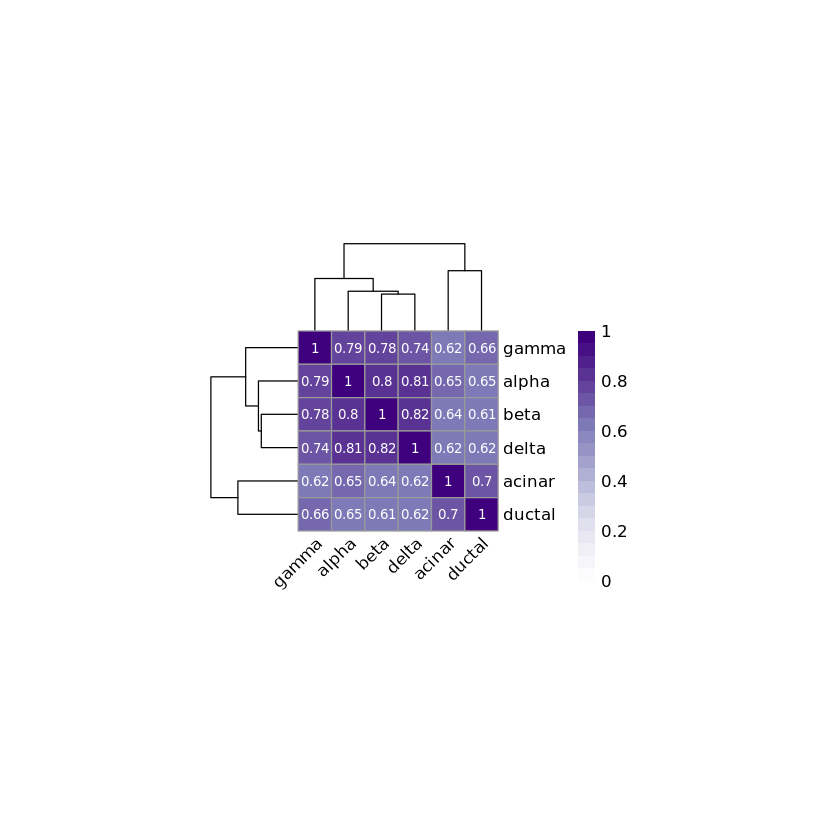

In [39]:
pheatmap(cormat ,cluster_rows = T,cluster_cols = T,
         col=col, cellwidth = 20, cellheight = 20, 
         display_numbers = round(cormat,2), number_color = "white",
         angle_col = 45, 
     #file = "/path/to/caQTL/stuff/figures/heatmap_corr_effects_all_run7F.pdf"
          ,breaks = seq(0,1,0.05)
        )

In [40]:
summary(cormat[upper.tri(cormat)]) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6125  0.6317  0.6637  0.7007  0.7810  0.8177 

### Shared caQTLs

In [41]:
wide =  spread(data = RES[,c('Feature', 'cell', 'qtl')], key=cell, value =qtl )

In [42]:
tab = rowSums(wide[,macro],na.rm=T)
tab[tab>=6] = '6+'
b=table(tab)[-1]
#tabm = rowSums(wide[,micro],na.rm=T)
#tabm[tabm>=6] = '6+'
#bm=table(tabm)[-1]
taba = rowSums(wide[,celltype_sel],na.rm=T)
taba[taba>=6] = '6+'
ba=table(taba)[-1]


In [43]:
dim(tab)
head(tab)

dim(b)
head(b)

dim(taba)
head(taba)

dim(ba)
head(ba)

NULL

[1] "0" "0" "0" "0" "0" "0"

[1] 6

tab
   1    2    3    4    5   6+ 
6698 1854  625  243   93   32 

NULL

[1] "0" "0" "0" "0" "0" "0"

[1] 6

taba
   1    2    3    4    5   6+ 
6697 1855  625  242   93   32 

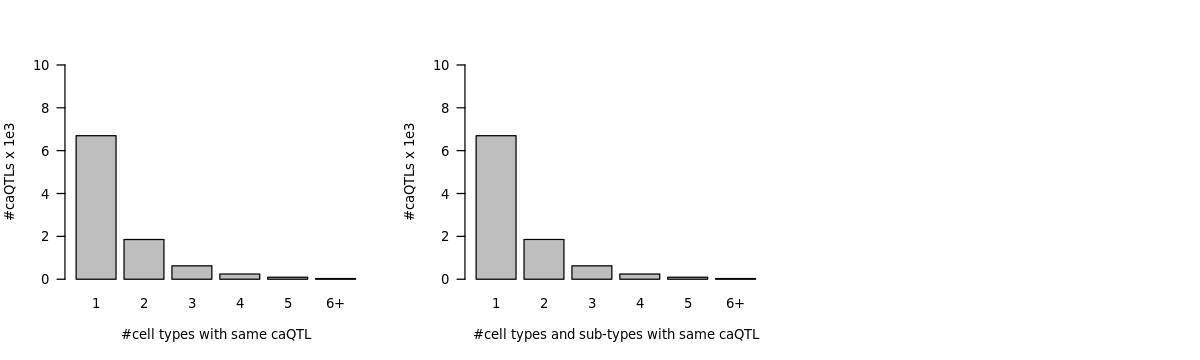

In [44]:
options(repr.plot.width=10, repr.plot.height=3)
par(mfrow=c(1,3), las=1)
barplot(b /1000,  xlab="#cell types with same caQTL",     ylab="#caQTLs x 1e3", ylim=c(0,10))
#barplot(bm/1000, xlab="#cell sub-types with same caQTL", ylab="#caQTLs x 1e3", ylim=c(0,10))
barplot(ba/1000, xlab="#cell types and sub-types with same caQTL", ylab="#caQTLs x 1e3", ylim=c(0,10))


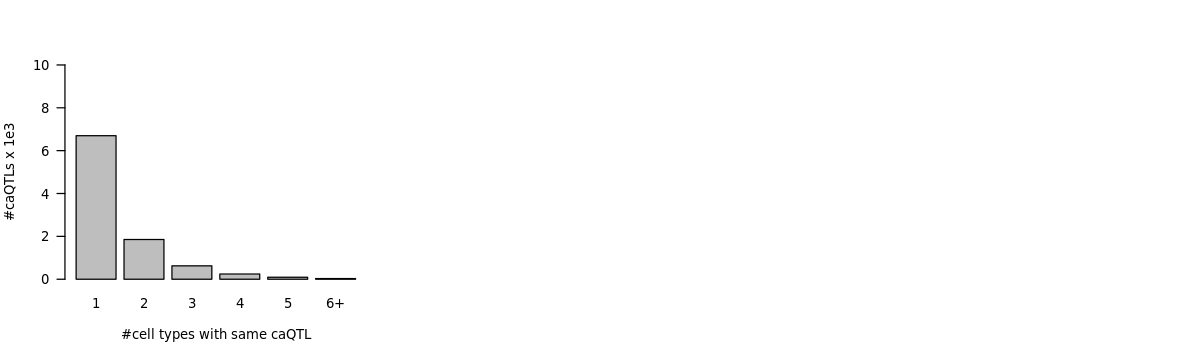

In [45]:
options(repr.plot.width=10, repr.plot.height=3)
par(mfrow=c(1,3), las=1)
barplot(b /1000,  xlab="#cell types with same caQTL",     ylab="#caQTLs x 1e3", ylim=c(0,10))
#barplot(bm/1000, xlab="#cell sub-types with same caQTL", ylab="#caQTLs x 1e3", ylim=c(0,10))
#barplot(ba/1000, xlab="#cell types and sub-types with same caQTL", ylab="#caQTLs x 1e3", ylim=c(0,10))


In [46]:
uniq = subset(wide, rowSums(wide[,celltype_sel],na.rm=T)==1)

In [47]:
uniq

,Feature,acinar,alpha,beta,bulk,delta,ductal,endothelial,gamma,immune,stellate
,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
16,chr1:100230079-100230551,NA,FALSE,TRUE,TRUE,NA,NA,NA,FALSE,NA,NA
35,chr1:100414592-100415141,NA,NA,TRUE,TRUE,FALSE,NA,NA,NA,NA,NA
36,chr1:100419054-100419666,NA,NA,TRUE,TRUE,NA,NA,NA,NA,NA,NA
80,chr1:100794556-100795689,NA,FALSE,TRUE,FALSE,FALSE,NA,NA,NA,NA,NA
134,chr1:101371181-101371798,FALSE,FALSE,TRUE,TRUE,NA,NA,NA,NA,NA,NA
473,chr1:108199202-108201089,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,NA,FALSE,FALSE,FALSE
518,chr1:108738135-108738561,NA,FALSE,TRUE,TRUE,NA,NA,NA,NA,NA,NA
580,chr1:109239486-109241167,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,NA,FALSE,NA,NA
596,chr1:109306748-109308049,FALSE,FALSE,TRUE,TRUE,FALSE,NA,NA,FALSE,NA,NA


In [48]:
colSums(uniq[,celltype_sel],na.rm=T)

acinar  alpha   beta  delta ductal  gamma 
  1250   1807   3350    142     75     73

In [49]:
jacmat           = matrix(NA, ncol=length(celltypes) , nrow=length(celltypes))
rownames(jacmat) = colnames(jacmat) = celltypes

for(c1 in celltypes){
     for(c2 in celltypes){

jacmat[c1,c2] = sum(rowSums(wide[,c(c1,c2)])==2, na.rm=T) / sum(rowSums(wide[,c(c1,c2)])>0, na.rm=T)
}
    }

In [50]:
col = colorRampPalette(brewer.pal(9, "PuRd"))(20)

In [51]:
pheatmap(jacmat[macro,macro], 
         col=col, cellwidth = 20, cellheight = 20, display_numbers = round(jacmat[macro,macro],2), 
         angle_col = 45, 
     file = "/path/to/caQTL/stuff/figures/heatmap_jac_macro_run1F.pdf"
          ,breaks = seq(0,1,0.05)
        )

pheatmap(jacmat[macro,macro], 
         col=col, cellwidth = 20, cellheight = 20, display_numbers = round(jacmat[macro,macro],2), 
         angle_col = 45, 
     #file = "/path/to/caQTL/stuff/figures/heatmap_jac_macro_run7F.pdf"
          ,breaks = seq(0,1,0.05)
        )
#pheatmap(jacmat[micro,micro], col=col, cellwidth = 20, cellheight = 20, display_numbers = round(jacmat[micro,micro],2), 
#         angle_col = 45, 
#     file = "../figures/heatmap_jac_micro_run3F.pdf"
#          ,breaks = seq(0,1,0.05)
#        )
#pheatmap(jacmat[micro,macro] ,cluster_rows = T,cluster_cols = T,
#         col=col, cellwidth = 20, cellheight = 20, 
#         display_numbers = round(jacmat[micro,macro],2), 
#         angle_col = 45, 
#     file = "../figures/heatmap_jac_micromacro_run3F.pdf"
#          ,breaks = seq(0,1,0.05)
#        )

pheatmap(jacmat ,cluster_rows = T,cluster_cols = T,
         col=col, cellwidth = 20, cellheight = 20, 
         display_numbers = round(jacmat,2), 
         angle_col = 45, 
     file = "/path/to/caQTL/stuff/figures/heatmap_jac_all_run1F.pdf"
          ,breaks = seq(0,1,0.05)
        )

pheatmap(jacmat ,cluster_rows = T,cluster_cols = T,
         col=col, cellwidth = 20, cellheight = 20, 
         display_numbers = round(jacmat,2), 
         angle_col = 45, 
     #file = "/path/to/caQTL/stuff/figures/heatmap_jac_all_run4F.pdf"
          ,breaks = seq(0,1,0.05)
        )


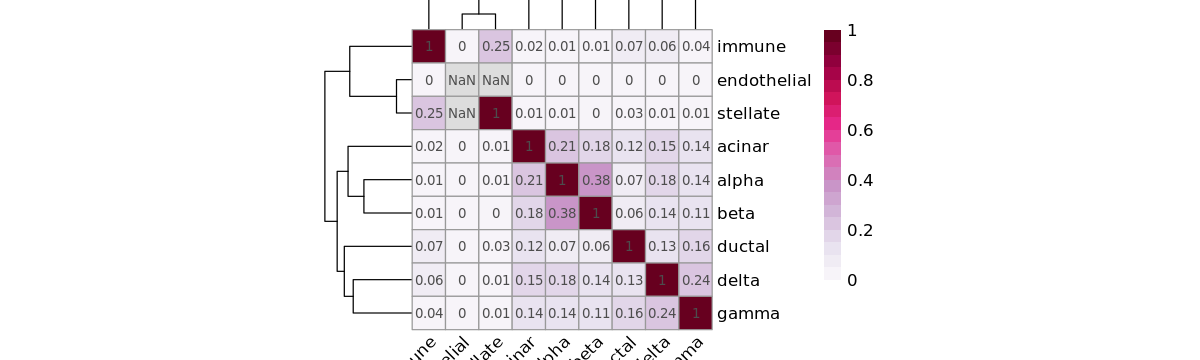

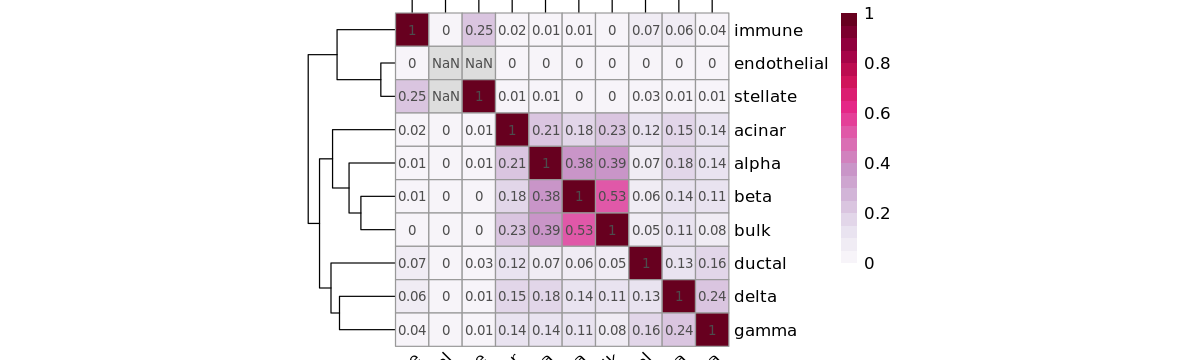

In [52]:
pheatmap(jacmat[macro,macro], 
         col=col, cellwidth = 20, cellheight = 20, display_numbers = round(jacmat[macro,macro],2), 
         angle_col = 45, 
     #file = "/path/to/caQTL/stuff/figures/heatmap_jac_macro_run7F.pdf"
          ,breaks = seq(0,1,0.05)
        )
pheatmap(jacmat ,cluster_rows = T,cluster_cols = T,
         col=col, cellwidth = 20, cellheight = 20, 
         display_numbers = round(jacmat,2), 
         angle_col = 45, 
     #file = "/path/to/caQTL/stuff/figures/heatmap_jac_all_run4F.pdf"
          ,breaks = seq(0,1,0.05)
        )

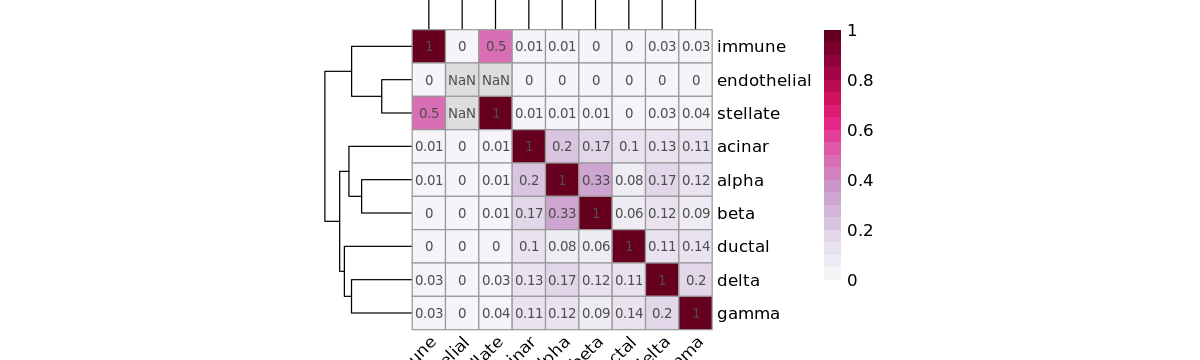

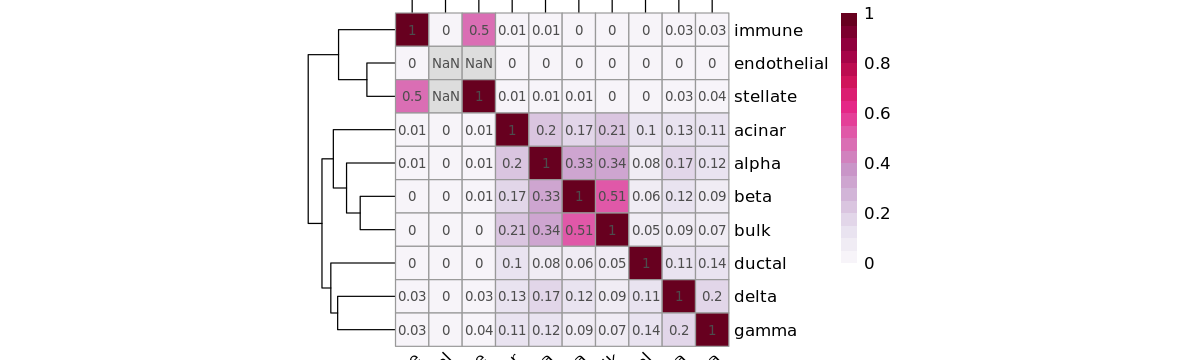

In [53]:
pheatmap(jacmat[macro,macro], 
         col=col, cellwidth = 20, cellheight = 20, display_numbers = round(jacmat[macro,macro],2), 
         angle_col = 45, 
     #file = "/path/to/caQTL/stuff/figures/heatmap_jac_macro_run7F.pdf"
          ,breaks = seq(0,1,0.05)
        )
pheatmap(jacmat ,cluster_rows = T,cluster_cols = T,
         col=col, cellwidth = 20, cellheight = 20, 
         display_numbers = round(jacmat,2), 
         angle_col = 45, 
     #file = "/path/to/caQTL/stuff/figures/heatmap_jac_all_run4F.pdf"
          ,breaks = seq(0,1,0.05)
        )